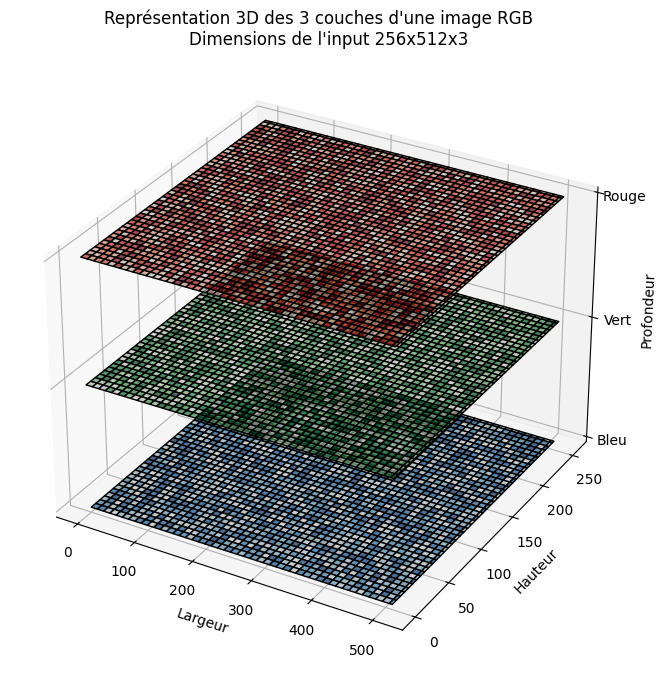

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# D√©finition des dimensions
HAUTEUR, LARGEUR = 256, 512

# G√©n√©ration de 3 matrices (valeurs al√©atoires pour l'exemple)
R = np.random.randint(0, 256, (HAUTEUR, LARGEUR))
G = np.random.randint(0, 256, (HAUTEUR, LARGEUR))
B = np.random.randint(0, 256, (HAUTEUR, LARGEUR))

# Cr√©ation de la grille de coordonn√©es X, Y
X, Y = np.meshgrid(np.arange(LARGEUR), np.arange(HAUTEUR))

# Position des 3 couches en profondeur
Z_R, Z_G, Z_B = np.full_like(R, 2), np.full_like(G, 1), np.full_like(B, 0)

# Cr√©ation de la figure 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Affichage des 3 matrices en tant que surfaces
ax.plot_surface(X, Y, Z_R, facecolors=plt.cm.Reds(R/255), edgecolor='k', alpha=0.7)
ax.plot_surface(X, Y, Z_G, facecolors=plt.cm.Greens(G/255), edgecolor='k', alpha=0.7)
ax.plot_surface(X, Y, Z_B, facecolors=plt.cm.Blues(B/255), edgecolor='k', alpha=0.7)

# Ajustements de la vue
ax.set_xlabel("Largeur")
ax.set_ylabel("Hauteur")
ax.set_zlabel("Profondeur")
ax.set_zticks([0, 1, 2])
ax.set_zticklabels(["Bleu", "Vert", "Rouge"])
ax.set_title(
    """Repr√©sentation 3D des 3 couches d'une image RGB
    Dimensions de l'entr√©e 256x512x3"""
    )

# Affichage
plt.show()


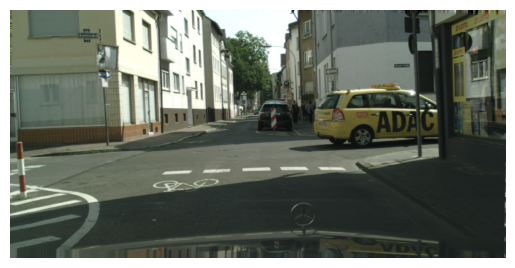

In [9]:
img = plt.imread("../front/images/frankfurt_000000_000294_leftImg8bit.png")
plt.imshow(img)
plt.axis("off")
plt.show()

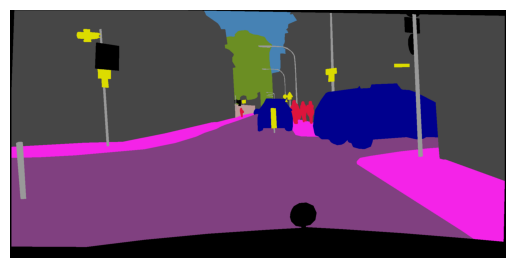

In [8]:
img = plt.imread("../front/images/frankfurt_000000_000294_gtFine_color.png")
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# D√©finition des dimensions
HAUTEUR, LARGEUR = 256, 512

# G√©n√©ration de 3 matrices (valeurs al√©atoires pour l'exemple)
R = np.random.randint(0, 256, (HAUTEUR, LARGEUR))
G = np.random.randint(0, 256, (HAUTEUR, LARGEUR))
B = np.random.randint(0, 256, (HAUTEUR, LARGEUR))

# Cr√©ation de la grille de coordonn√©es X, Y
X, Y = np.meshgrid(np.arange(LARGEUR), np.arange(HAUTEUR))

# Position des 3 couches en profondeur
Z_R, Z_G, Z_B = np.full_like(R, 2), np.full_like(G, 1), np.full_like(B, 0)

# Cr√©ation de la figure 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Affichage des 3 matrices en tant que surfaces
ax.plot_surface(X, Y, Z_R, facecolors=plt.cm.Reds(R/255), edgecolor='k', alpha=0.7)
ax.plot_surface(X, Y, Z_G, facecolors=plt.cm.Greens(G/255), edgecolor='k', alpha=0.7)
ax.plot_surface(X, Y, Z_B, facecolors=plt.cm.Blues(B/255), edgecolor='k', alpha=0.7)

# Ajustements de la vue
ax.set_xlabel("Largeur")
ax.set_ylabel("Hauteur")
ax.set_zlabel("Profondeur")
ax.set_zticks([0, 1, 2])
ax.set_zticklabels(["Bleu", "Vert", "Rouge"])
ax.set_title(
    """Repr√©sentation 3D des 3 couches d'une image RGB
    Dimensions de l'entr√©e 256x512x3"""
    )

# Affichage
plt.show()

# Notes

## Workflow
https://docs.google.com/document/d/1kIbxaqzdPZqHEJRxwuFCAar-G8W78VFRgDUEF5Mesjw/edit?invite=CI_q4swC&tab=t.0


## To-Do

- Analyse pr√©-exploratoire et pr√©paration des donn√©es
    - Regarder l'√©quilibre des cat√©gories avant le train-test-split ? Possible avec np.unique_counts(img_array) sur chaque image (se servir du multiprocessing)
    - Bien formaliser le code du train test split, l'inclure dans utils and constants

- Modele
    - Ajouter une visualisation entre courbe de loss train vs loss val + nom de la fonction de perte + dump
    - Finaliser les callbacks (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau)
    - fonction de visualisation sur la pr√©diction √† affiner
    - plot des m√©triques √† affiner + dump
    - En fonction des d√©s√©quilibres ajouter du sample_weight dans le mod√®le : https://www.tensorflow.org/tutorials/images/segmentation



# Future comms

##  **Les diff√©rents types de segmentation**
---

Un mod√®le de segmentation d'image g√©n√®re en sortie une carte de segmentation o√π chaque pixel est classifi√© dans une cat√©gorie sp√©cifique. La structure de la couche de sortie d√©pend du type de segmentation :


### **1. Segmentation s√©mantique (ex : UNet, DeepLabV3)**
Chaque pixel appartient √† une classe parmi un nombre fixe de classes.

- **Couche de sortie** : une convolution 2D avec autant de canaux que de classes (`Conv2D(num_classes, kernel_size=1)`).  
- **Tenseur de sortie** : `[batch_size, height, width, num_classes]`.  
- **Post-traitement** : on applique une fonction **softmax** (multiclasses) ou **sigmo√Øde** (binaire) pour obtenir des probabilit√©s.  
- **Pr√©diction finale** : l'index du canal ayant la probabilit√© la plus √©lev√©e pour chaque pixel.
- **M√©trique** : l'accuracy n'est pas une bonne m√©trique pour la segmentation, on utilise plut√¥t l'**Intersection over Union (IoU)** ou le **Dice Score**.
  - Pour les m√©triques, y_true est de forme sparse (ex : [batch_size, height, width]) et y_pred est de forme dense (ex : [batch_size, height, width, num_classes]).
- **Loss** : on utilise souvent la **cross-entropy** pour la segmentation multiclasse.
  - Pour des raisons computationnelles, on va pr√©f√©rer la fonction de perte `sparse_categorical_crossentropy` (attends y_true sous forme sparse (batch_size, height, width)) √† `categorical_crossentropy` (attend y_true sous forme dense (batch_size, height, width, num_classes)) pour les probl√®mes de segmentation multiclasse.
  - Si on a des probl√®mes de d√©s√©quilibre de classes, il faut ajouter des samples weights dans la loss. (voir guide tensorflow)
  - L'argument from_logits=True dans la fonction de perte indique que la sorte `y_pred` est un vecteur de logits de size `num_classes` sans fonction d'activation.
  - L'agument from_logits=False indique que la sortie `y_pred` est un vecteur de probabilit√©s de size `num_classes` avec une fonction d'activation (softmax).
  - L'argument class_weights permet de donner plus de poids √† certaines classes pour compenser un d√©s√©quilibre de classes.


üí° **Exemple en segmentation binaire (ex : fond vs objet)**  
- Derni√®re couche : `Conv2D(1, kernel_size=1, activation="sigmoid")`  
- La sortie est de forme `[batch_size, height, width, 1]` avec des valeurs entre 0 et 1 (probabilit√© d'appartenir √† la classe positive).

üí° **Exemple en segmentation multiclasse (ex : route, voiture, ciel, etc.)**  
- Derni√®re couche : `Conv2D(num_classes, kernel_size=1, activation="softmax")`  
- La sortie est `[batch_size, height, width, num_classes]`, et on prend `argmax` sur l'axe des classes.


### **2. Segmentation instance (ex : Mask R-CNN)**
Chaque instance d'un objet a un identifiant unique.

- **Sortie plus complexe** :  
  - Une **carte de segmentation** par objet d√©tect√© (`[batch_size, num_objects, height, width]`).  
  - Une **carte des scores** (`[batch_size, num_objects]`) pour indiquer la confiance de chaque masque.  
  - Une **bo√Æte englobante** pour chaque instance.  

Ici, chaque pixel peut appartenir √† plusieurs objets en m√™me temps, contrairement √† la segmentation s√©mantique.


### **R√©sum√©**
| Type de segmentation | Forme de sortie | Activation | Post-traitement |
|----------------------|----------------|------------|-----------------|
| **Binaire** | `[batch, h, w, 1]` | Sigmo√Øde | Seuil (0.5) |
| **Multiclasse** | `[batch, h, w, num_classes]` | Softmax | `argmax` sur classes |
| **Instance** | `[batch, num_objects, h, w]` + scores | Variable | Seuil + NMS |

## **Pr√©sentation de UNET**

---

**UNet**, un mod√®le bien connu pour la segmentation s√©mantique. Ce mod√®le prend une image RGB de **256x512x3** et renvoie une carte de segmentation de **256x512x8** avec 8 classes.

U-Net is a CNN architecture used for most of the segmentation tasks. It consists of a contraction and expansion path which gives it the name UNet. The contraction path consists of a convolution layer, followed by ReLu followed by max-pooling layers. Along the contraction path, the features get extracted and the spatial information is reduced. Along the expansion path, a series of up convolutions along with concatenation of nigh resolution features are done from the contraction path. The final layer is a 1x1 convolution layer which gives the output of the same size as the input image. The output is a mask of the same size as the input image with each pixel having a value between 0 and 1. The final output is obtained by applying a threshold of 0.5 to the output mask.

### **Architecture du mod√®le :**
- Encodeur (feature extractor) bas√© sur **convolutions** + **max pooling** pour extraire les features.
- D√©codeur avec **upsampling** (**upconv**) + **concatenation encodeur+decodeur** pour revenir √† la r√©solution d'origine.
- Derni√®re couche avec **8 canaux** et activation **softmax** pour obtenir une distribution de probabilit√© sur les classes.

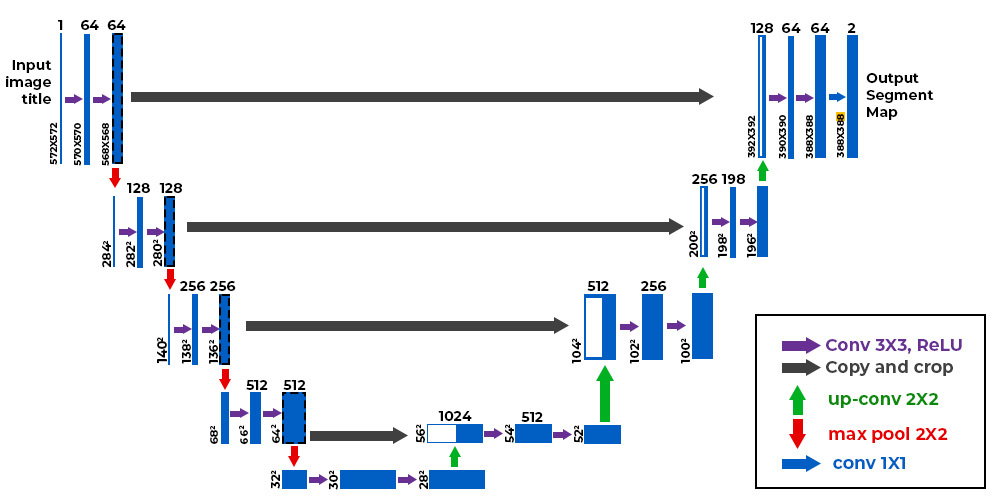


### **Explication de la sortie :**
- La derni√®re couche `Conv2D(8, (1,1), activation="softmax")` g√©n√®re un tenseur **(256, 512, 8)**.
- Chaque pixel contient un vecteur de **8 probabilit√©s** (une par classe).
- Pour obtenir l‚Äôimage segment√©e finale, on prend `argmax` sur l‚Äôaxe des classes pour assigner chaque pixel √† la classe la plus probable.


### **R√©sum√© :**
‚úÖ **Entr√©e** : Image `(256,512,3)`  
‚úÖ **Sortie** : Carte de segmentation `(256,512,8)`  
‚úÖ **Activation finale** : `softmax` pour classification pixel par pixel  
‚úÖ **Post-traitement** : `argmax` pour obtenir la classe de chaque pixel  

## **Format des labels de sortie pour la segmentation**

---

Le format des labels d√©pend de la **fonction de perte** utilis√©e. Comme ta couche de sortie utilise une activation **softmax** et g√©n√®re une sortie `(num_batches, 256, 512, 8)`, voici les deux options possibles :  


### **1Ô∏è‚É£ Labels sous forme d‚Äôindex : `(num_batches, 256, 512)`**  
üëâ **Format :** Chaque pixel est repr√©sent√© par un entier correspondant √† l'index de sa classe (0 √† 7).  
üëâ **Fonction de perte :** `SparseCategoricalCrossentropy(from_logits=False)`  

**Exemple d'un batch de labels :**  
```python
y_true.shape  # (num_batches, 256, 512), dtype=int
y_true[0, 100, 200]  # Exemple : 3 (classe 3 assign√©e au pixel (100,200))
```

‚úÖ **Avantages** :
- Plus l√©ger en m√©moire.  
- Pas besoin de conversion avant l‚Äôentra√Ænement.  

üöÄ **Comment charger les labels ?**  
```python
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
```


### **2Ô∏è‚É£ Labels en one-hot : `(num_batches, 256, 512, 8)`**  
üëâ **Format :** Chaque pixel est repr√©sent√© par un vecteur de probabilit√© o√π une seule position est √† 1 (one-hot encoding).  
üëâ **Fonction de perte :** `CategoricalCrossentropy(from_logits=False)`  

**Exemple d'un pixel encod√© en one-hot (classe 3)** :  
```python
[0, 0, 0, 1, 0, 0, 0, 0]  # Classe 3 activ√©e
```

‚úÖ **Avantages** :
- Permet de travailler avec des **poids de classes** si les classes sont d√©s√©quilibr√©es.  
- Peut √™tre plus stable pour certaines architectures.  

üöÄ **Comment charger les labels ?**  
```python
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
```
üí° Si tes labels sont sous forme `(num_batches, 256, 512)`, il faut les **convertir en one-hot** avant l‚Äôentra√Ænement :  
```python
y_true_onehot = tf.one_hot(y_true, depth=8)  # Convertit (batch, 256, 512) ‚Üí (batch, 256, 512, 8)
```



### **üìå Quelle approche choisir ?**  
‚úÖ **Si tes labels sont stock√©s comme une image avec une seule valeur par pixel** ‚Üí **`SparseCategoricalCrossentropy`** (option 1, plus simple).  
‚úÖ **Si tu veux manipuler les probabilit√©s ou ajuster les poids des classes** ‚Üí **`CategoricalCrossentropy`** (option 2, one-hot).  

üöÄ **Recommandation :** Utilise la premi√®re approche `(num_batches, 256, 512)` car elle est plus efficace en m√©moire et plus simple √† g√©rer.  


## Les m√©triques pour la segmentation d'images
---


Voici un tableau r√©capitulatif des applications des m√©triques d'√©valuation en segmentation d'images :  

| **Applications**         | **Metrics Used**                | **Explanation**  |
|--------------------------|--------------------------------|-----------------|
| **Medical Imaging**      | Dice Coefficient, Hausdorff Distance | Assure une segmentation pr√©cise pour la d√©tection de tumeurs, la d√©limitation des organes et l'identification d'anomalies, essentielle pour le diagnostic et le traitement. |
| **Autonomous Driving**   | IoU, Pixel Accuracy           | √âvalue la capacit√© du mod√®le √† identifier et localiser des objets (pi√©tons, v√©hicules, panneaux) pour garantir une navigation s√©curis√©e des v√©hicules autonomes. |
| **Satellite and Aerial Imaging** | IoU, Boundary F1 Score | Analyse la classification du couvert terrestre, la planification urbaine et la surveillance environnementale, en √©valuant la pr√©cision des r√©gions segment√©es et des contours. |
| **Agriculture**          | Dice Coefficient, Precision   | Mesure la segmentation des zones de culture saines et malades, facilitant la gestion des cultures et l‚Äôoptimisation des rendements. |
| **Augmented Reality (AR)** | IoU, Pixel Accuracy         | Garantit un alignement pr√©cis des objets virtuels sur les surfaces du monde r√©el pour am√©liorer l‚Äôexp√©rience utilisateur. |

Ce tableau synth√©tise les principales m√©triques utilis√©es selon les applications et leur importance.

## Formulas


Voici un tableau r√©capitulatif des formules des principales m√©triques d'√©valuation en segmentation d'images :  

| **M√©trique**           | **Formule**  |
|------------------------|-------------|
| **Dice Coefficient**   | \( \frac{2TP}{2TP + FP + FN} \) |
| **IoU (Intersection over Union)** | \( \frac{TP}{TP + FP + FN} \) |
| **Pixel Accuracy**     | \( \frac{TP + TN}{TP + TN + FP + FN} \) |
| **Precision**         | \( \frac{TP}{TP + FP} \) |
| **Recall (Sensitivity)** | \( \frac{TP}{TP + FN} \) |
| **F1 Score**          | \( \frac{2 \times Precision \times Recall}{Precision + Recall} \) |
| **Boundary F1 Score** | Bas√© sur la F1 Score mais appliqu√© aux contours segment√©s (requiert un calcul spatial des fronti√®res) |
| **Hausdorff Distance** | \( \max \{ \sup_{a \in A} \inf_{b \in B} d(a,b), \sup_{b \in B} \inf_{a \in A} d(a,b) \} \) (distance maximale entre les fronti√®res de la segmentation et de la v√©rit√© terrain) |

Ces formules utilisent les termes :
- **TP (True Positives)** : pixels correctement class√©s comme appartenant √† la classe cible.
- **TN (True Negatives)** : pixels correctement class√©s comme n'appartenant pas √† la classe cible.
- **FP (False Positives)** : pixels incorrectement class√©s comme appartenant √† la classe cible.
- **FN (False Negatives)** : pixels incorrectement class√©s comme n'appartenant pas √† la classe cible.

## Critiques des m√©triques
Pour √©valuer la qualit√© de la segmentation d'images, on utilise des m√©triques sp√©cifiques qui comparent les pr√©dictions du mod√®le aux vrais labels en mesurant la qualit√© de l'overlapping entre le y_pred et y_true. Voici les principales m√©triques utilis√©es pour √©valuer la segmentation d'images :
- Pixel accuracy pas recommande lorsquil a une  classe dominante comme le background. prends en compte tp et tn
    - (tn+tp)/(tn+fp+fn+fp)


- precision, recall & dice (f1 S√∏rensen‚ÄìDice index) ok (tp dans le num√©rateur)
    - p (tp)/(tp+fp) : Precision measures the proportion of true positive pixels among all pixels classified as positive by the model
    - r (tp)/(tp+fn) : Recall, on the other hand, measures the proportion of true positive pixels that were correctly identified out of all actual positive pixels
    - d (tp+tp)/(tp+tp+fn+fp) : Dice is the harmonic mean of precision and recall. It is a common metric for segmentation tasks because it is more sensitive to small objects than accuracy.
    - High precision indicates that the model has a low false positive rate, while high recall indicates a low false negative rate.

- IoU, Jaccard Index : best > tp (intersect) dans le numerateur et union dans le diviseur (diviseur tout sauf tn)
    - (tp)/(tp+fn+fp)
    - dice harmonic mean
    - iou > penalize more fp and add a SMOOTH factor to avoid division by 0 and compute IoU for each class absent in the image

- Soft (on probabilities without argmax) / hard (with argmax as ohe)


## Focus on Jackard Index & Dice Coefficient

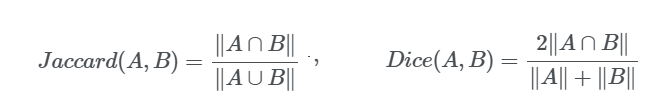

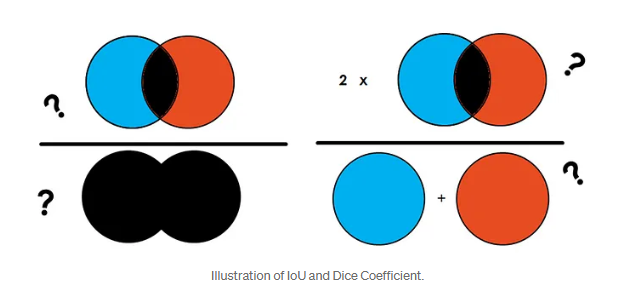


- A gauche, Interesection / Union : IoU = TP / (TP + FP + FN)
- A droite, Dice : Dice (Harmonic mean between recall and precision) = 2 * TP / (2 * TP + FP + FN)

## JACCARD CALCULATION

Let‚Äôs calculate the ship IoU first. We assume the total area of the image is 100 (100 pixels). First, let‚Äôs think about the ships‚Äô overlap. We can pretend that we move the predicted segmentation (left) directly above the ground truth (right), and see if there are any ship pixels that overlap. Since there are no pixels that are classified as ships by the model, there are 0 overlapping ship pixels.

Union consists of all of the pixels classified as ships from both images, minus the overlap/intersection. In this case, there are 5 pixels (this is an arbitrary number choice) that are classified as ships total. Subtract the overlap/intersection which is 0 to get 5 as the area of union. After doing the calculations, we learn that the IoU is merely 47.5%! See the calculation below.

Here is the detailed calculation:

Ships: Area of Overlap = 0, Area of Union = (5+0)-0 =5

Area of Overlap/Area of Union = 0%

Now for the black background, we do the same thing.

Background: Area of Overlap = 95, Area of Union = (95+100)‚Äì95 = 100

Area of Overlap/Area of Union =95%

Mean IoU = (Ships + Background)/2 = (0%+95%)/2 = 47.5%

## DICE CALCULATION

Total Number of Pixels for both images combined = 200

Ships: Area of Overlap = 0

(2 * Area of Overlap)/(total pixels combined) = 0/200 = 0

Background: Area of Overlap = 95

(2 * Area of Overlap)/(total pixels combined) = 95*2/200 = 0.95

Dice = (Ships + Background)/2 = (0%+95%)/2 = 47.5%

## Others metrics

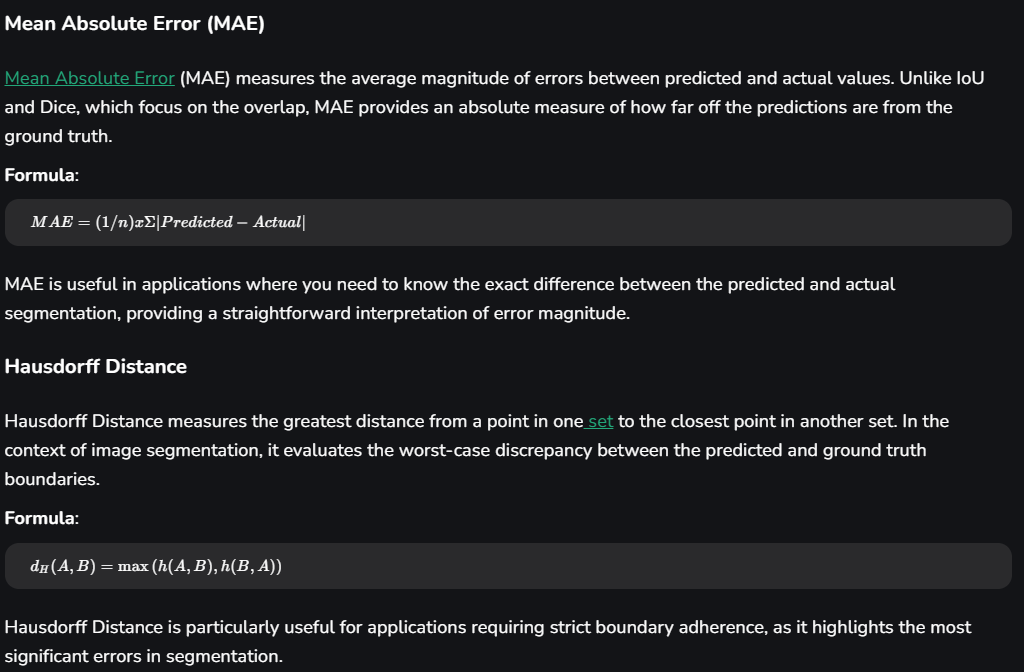

## **ConvNet Architectures**
We have seen that Convolutional Networks are commonly made up of only three layer types: CONV, POOL (we assume Max pool unless stated otherwise) and FC (short for fully-connected). We will also explicitly write the RELU activation function as a layer, which applies elementwise non-linearity. In this section we discuss how these are commonly stacked together to form entire ConvNets.

- Converting FC layers to CONV layers
    - It is worth noting that the only difference between FC and CONV layers is that the neurons in the CONV layer are connected only to a local region in the input, and that many of the neurons in a CONV volume share parameters. However, the neurons in both layers still compute dot products, so their functional form is identical. Therefore, it turns out that it‚Äôs possible to convert between FC and CONV layers:


### üìå **1. Composants d'un CNN**
Un CNN est constitu√© de plusieurs types de couches :

#### **üîπ Couches Convolutives (Conv Layer)**
- Appliquent des filtres (kernels) pour extraire des **caract√©ristiques locales**.
- G√©n√®rent des **cartes de caract√©ristiques (feature maps)**.
- Hyperparam√®tres : **taille du kernel, stride, padding**.

#### **üîπ Couches d'Activation**
- Introduisent la **non-lin√©arit√©**.
- Fonction la plus courante : **ReLU** (Rectified Linear Unit).

#### **üîπ Couches de Pooling (Sous-√©chantillonnage)**
- R√©duisent la **dimensionnalit√©** et la **sensibilit√© au bruit**.
- Types :
  - **Max Pooling** : prend la valeur maximale d‚Äôune r√©gion.
  - **Average Pooling** : prend la moyenne.

#### **üîπ Couches Fully Connected (Dense)**
- Transforme les cartes de caract√©ristiques en un **vecteur** pour la classification.
- Derni√®re couche : souvent **Softmax** pour la classification multi-classes.

---

### üî• **2. Architectures Populaires de CNN**
Voici quelques architectures CNN c√©l√®bres :

#### **1Ô∏è‚É£ LeNet-5 (1998)**
- Premier CNN utilis√© pour la reconnaissance de chiffres manuscrits.
- **Structure** :
  - Conv ‚Üí Pool ‚Üí Conv ‚Üí Pool ‚Üí Dense ‚Üí Output
- Tr√®s simple mais efficace pour de petites images (comme MNIST).

#### **2Ô∏è‚É£ AlexNet (2012)**
- A r√©volutionn√© la vision par ordinateur en gagnant ImageNet.
- **Structure** :
  - 5 Convolution + Pooling ‚Üí 3 Fully Connected
- Introduit **ReLU**, **Dropout** et **GPU training**.

#### **3Ô∏è‚É£ VGG (2014)**
- Approche modulaire avec des **kernels 3x3** pour toutes les convolutions.
- **Variantes : VGG-16, VGG-19**.
- Tr√®s profond mais lourd en calcul.

#### **4Ô∏è‚É£ GoogLeNet (Inception) (2014)**
- Introduit les **Inception Blocks** : diff√©rentes tailles de filtres en parall√®le.
- **Moins de param√®tres** qu‚ÄôAlexNet ou VGG gr√¢ce √† l‚Äôutilisation de convolutions 1x1.

#### **5Ô∏è‚É£ ResNet (2015)**
- Introduit les **skip connections (r√©siduals)**.
- R√©sout le probl√®me du **gradient vanishing** dans les r√©seaux profonds.
- Variantes : **ResNet-18, ResNet-34, ResNet-50, ResNet-101**.

#### **6Ô∏è‚É£ EfficientNet (2019)**
- Bas√© sur une optimisation du **scaling** (taille des filtres, profondeur, r√©solution).
- Tr√®s performant avec moins de calculs que ResNet.

---

### üöÄ **3. Conception d‚Äôun CNN en TensorFlow/Keras**
Un exemple de CNN simple avec **Keras** :

```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes pour classification
])

model.summary()
```

---

### üéØ **4. Choisir une Architecture CNN**
| **Mod√®le**   | **Avantages** | **Inconv√©nients** |
|-------------|--------------|----------------|
| **LeNet-5**  | Simple et rapide | Mauvaise g√©n√©ralisation sur images complexes |
| **AlexNet**  | Performant sur grands datasets | Tr√®s lourd en calcul |
| **VGG**      | Facile √† impl√©menter | Nombre de param√®tres √©norme |
| **GoogLeNet** | Moins de param√®tres | Complexe √† impl√©menter |
| **ResNet**   | Permet des r√©seaux tr√®s profonds | Plus gourmand en m√©moire |
| **EfficientNet** | Performant et l√©ger | Architecture optimis√©e difficile √† ajuster |


## Conversion des couches FC et CONV

---

### üîπ **1. Passage de l'extraction de caract√©ristiques √† la classification**
- **Les couches convolutives** apprennent des **descripteurs locaux** (bords, textures, motifs).
- **Les couches fully connected** interpr√®tent ces descripteurs pour faire une **pr√©diction globale**.
- Convertir une couche conv en dense permet de **transformer les cartes de caract√©ristiques en un vecteur de d√©cision**.


### üîπ **2. Compatibilit√© avec un classifieur classique**
- **Les couches convolutives g√©n√®rent des matrices 3D** (hauteur, largeur, canaux).
- **Les couches fully connected prennent des vecteurs en entr√©e**.
- La conversion (via un `Flatten()`) permet d'utiliser un **classifieur dense** comme Softmax ou une MLP.

üîπ **Exemple en TensorFlow/Keras** :
```python
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),  # Conversion de la sortie convolutive en vecteur
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Classification sur 10 classes
])
```
- La couche `Flatten()` convertit la sortie des convolutions en **un vecteur 1D** utilisable par les couches `Dense`.

---

### üîπ **3. R√©duction de la dimensionnalit√© et adaptation aux t√¢ches**
- Dans certains cas, une conversion en fully connected permet de **r√©duire la taille des param√®tres** et d'ajuster l'architecture.
- Exemple : en **transformant les cartes de caract√©ristiques en un vecteur plus petit**, on peut mieux g√©n√©raliser et √©viter le surajustement.

---

### üîπ **4. Simulation d‚Äôune convolution avec une couche Dense**
- Une **couche convolutionnelle peut √™tre r√©√©crite comme une couche dense** si l'on ignore le partage de poids.
- Exemple : une **convolution 1x1 avec autant de filtres que d'entr√©es** est **√©quivalente √† une couche dense**.

---

### üîπ **5. R√©duction du besoin en m√©moire et calcul**
- **Transformer une convolution en fully connected** peut parfois r√©duire la m√©moire et acc√©l√©rer l‚Äôinf√©rence.
- Exemple : Dans certains mod√®les mobiles (**MobileNet, SqueezeNet**), une **derni√®re convolution 1x1 remplace les couches fully connected** pour r√©duire le nombre de param√®tres.

---

### üéØ **Conclusion**
‚úÖ **Transformer une couche convolutive en fully connected** permet :
- D‚Äôadapter les sorties convolutives pour une t√¢che de classification.
- D‚Äôobtenir un vecteur compatible avec des classifieurs denses.
- De modifier l‚Äôarchitecture pour r√©duire la complexit√©.

üëâ **Alternatives modernes** : Au lieu de `Flatten()`, certains mod√®les utilisent **Global Average Pooling (GAP)** pour obtenir une sortie plus robuste et compacte :

```python
layers.GlobalAveragePooling2D()
```

## Pooling vs Convolution avec Stride

---

### üîπ **1. Diff√©rences entre Pooling et Convolution avec Stride**
| **Crit√®re** | **Pooling (Max/Average)** | **Convolution avec Stride** |
|------------|--------------------------|----------------------------|
| **Principe** | Sous-√©chantillonne l‚Äôimage en prenant un maximum (max pooling) ou une moyenne (average pooling). | Utilise des filtres qui glissent sur l‚Äôimage avec un pas (`stride > 1`), supprimant ainsi des pixels. |
| **Perte d‚Äôinformation** | Peut perdre des d√©tails importants (surtout avec max pooling). | Garde plus d‚Äôinformations car la convolution apprend des poids adapt√©s. |
| **Param√®tres appris** | Aucun (op√©ration fixe). | Oui (les poids du filtre sont optimis√©s pendant l‚Äôentra√Ænement). |
| **Consommation m√©moire** | Moins co√ªteux (aucun param√®tre √† apprendre). | Plus gourmand en calculs (param√®tres √† optimiser). |
| **Effet sur le gradient** | Peut causer des pertes d‚Äôinformations abruptes et un gradient moins stable. | Lisse mieux la propagation du gradient gr√¢ce aux poids appris. |

---

### üî• **2. Pourquoi utiliser une convolution avec stride √† la place du pooling ?**
#### ‚úÖ **Avantages de la convolution avec stride :**
1. **Meilleure optimisation** :  
   - Les **poids du filtre** sont appris, contrairement au pooling qui est une op√©ration fixe.
   - Permet au mod√®le d‚Äôoptimiser l‚Äôextraction de caract√©ristiques sans perdre trop d‚Äôinformations.
   
2. **Propagation du gradient am√©lior√©e** :  
   - Moins de perte d‚Äôinformation abrupte que le max pooling.
   - R√©duit le risque de disparition du gradient dans les r√©seaux tr√®s profonds.

3. **Moins d‚Äôop√©rations distinctes** :  
   - √âvite d‚Äôavoir une couche suppl√©mentaire pour le pooling ‚Üí simplifie l‚Äôarchitecture.

4. **Utilis√© dans les architectures modernes** :  
   - **ResNet, MobileNet, DenseNet** pr√©f√®rent **les convolutions avec stride** au lieu des **poolings classiques**.

---

### ‚ö†Ô∏è **3. Mais faut-il compl√®tement √©viter le pooling ?**
Pas forc√©ment ! Il existe des cas o√π le **pooling reste utile** :

1. **Max pooling pour une meilleure invariance aux translations**  
   - Le max pooling **r√©duit la sensibilit√© aux petits d√©placements** dans l‚Äôimage.
   - Utile pour **des t√¢ches de reconnaissance d‚Äôobjets** o√π la position exacte n‚Äôest pas importante.

2. **Average pooling dans les architectures r√©centes**  
   - Le **Global Average Pooling (GAP)** est souvent utilis√© pour r√©duire les dimensions tout en gardant une bonne g√©n√©ralisation :
   ```python
   layers.GlobalAveragePooling2D()
   ```
   - Utilis√© dans **ResNet, MobileNet** pour √©viter des couches fully connected trop grandes.

---

### üéØ **4. Recommandation selon les cas**
| **Cas d‚Äôusage** | **Pooling classique** | **Convolution avec stride** |
|----------------|----------------------|----------------------------|
| **T√¢ches classiques (classification d‚Äôimages)** | ‚úÖ Max Pooling souvent efficace. | üö´ Pas toujours n√©cessaire. |
| **Mod√®les modernes (MobileNet, ResNet, EfficientNet)** | üö´ Souvent remplac√© par GAP. | ‚úÖ Strided Convolution pr√©f√©rable. |
| **Besoin d‚Äôinvariance aux translations** | ‚úÖ Max Pooling utile. | üö´ Moins efficace. |
| **Optimisation des calculs sur GPU** | üö´ Pooling moins flexible. | ‚úÖ Strided Convolution plus efficace sur certains hardware. |

---

### üéØ **Conclusion**
üëâ **Remplacer le pooling par une convolution avec stride est souvent b√©n√©fique**, mais pas toujours obligatoire.  
üëâ Les architectures modernes tendent √† privil√©gier **les convolutions avec stride ou le Global Average Pooling (GAP)** au lieu du max pooling.  
üëâ **Si tu veux un r√©seau plus optimis√© et entra√Ænable, √©vite le pooling et favorise les convolutions avec stride.** üöÄ  

Tu travailles sur quel type de CNN ? üòä

## CONV LAYER & POOL LAYER Input to Output

### CONV LAYER FILTERS (K) AND STRIDE (S) AND PADDING (P) AND SPATIAL EXTENT (F) vs W x H x D (input) 
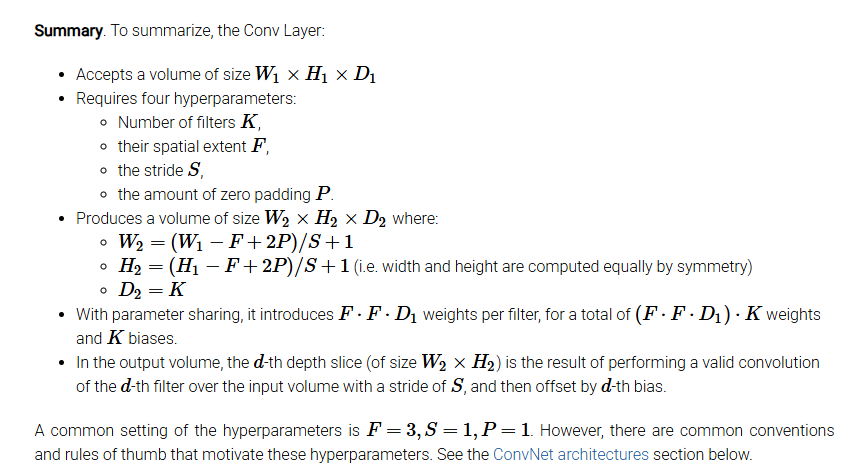

### POOL LAYER FILTERS (K) AND STRIDE (S) AND SPATIAL EXTENT (F) vs W x H x D (input)
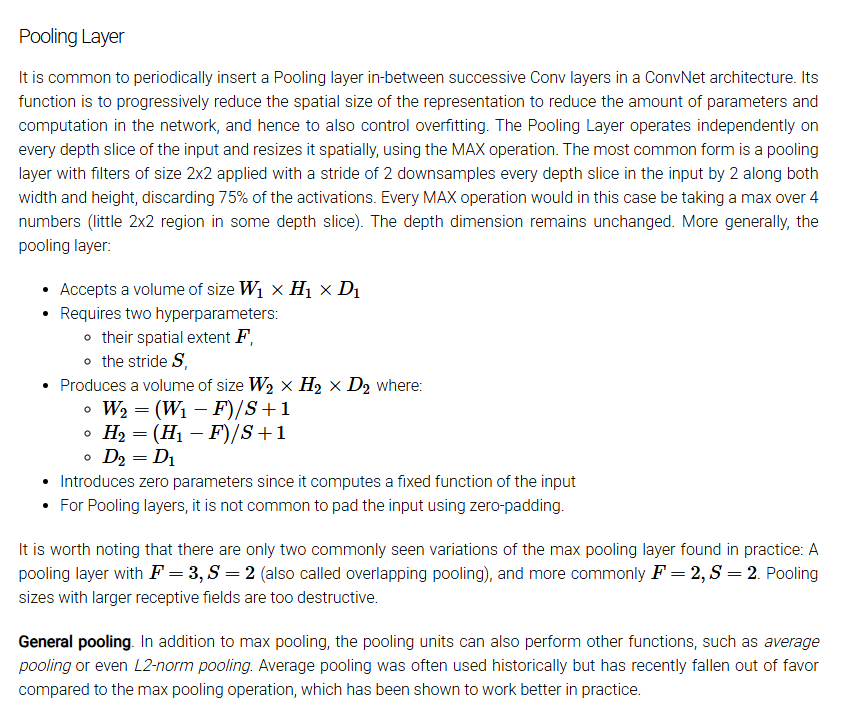

## **Loss & Optimizer**
---

Optimizer that implements the AdamW algorithm.

AdamW optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments with an added method to decay weights per the techniques discussed in the paper, 'Decoupled Weight Decay Regularization' by Loshchilov, Hutter et al., 2019.

According to Kingma et al., 2014, the underlying Adam method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

https://arxiv.org/pdf/1711.05101

Oui, **l'accumulation de gradients** peut indirectement am√©liorer la g√©n√©ralisation, mais ce n'est pas automatique. Voici pourquoi :  

‚úÖ **Moins de bruit dans les gradients** : Un petit batch produit des gradients plus bruyants, ce qui peut rendre l'optimisation instable. L'accumulation de gradients lisse ces variations et rend l'entra√Ænement plus stable.  

‚úÖ **Effet similaire √† un plus grand batch** : En accumulant les gradients sur plusieurs mini-batchs, on se rapproche du comportement d‚Äôun entra√Ænement avec un grand batch effectif, qui peut am√©liorer la convergence et la stabilit√©.  

üö® **Mais attention** :  
- Une g√©n√©ralisation optimale d√©pend aussi d'autres facteurs comme **le taux d‚Äôapprentissage, la r√©gularisation (dropout, weight decay), et la diversit√© des donn√©es**.  
- Accumuler trop de gradients peut **r√©duire la stochasticit√©**, ce qui peut parfois **nuire √† la g√©n√©ralisation** (d'o√π l‚Äôint√©r√™t des petits batchs pour √©viter un sur-apprentissage).  

En gros, c‚Äôest **un bon compromis** pour stabiliser l'entra√Ænement avec un petit batch, mais il ne remplace pas les autres techniques d'am√©lioration de la g√©n√©ralisation.  

Tu cherches √† optimiser un mod√®le pr√©cis avec cette approche ? üòä

Le papier *Adam: A Method for Stochastic Optimization* de **Diederik P. Kingma** et **Jimmy Ba** pr√©sente plusieurs d√©couvertes th√©oriques concernant l‚Äôoptimisation stochastique et les m√©thodes d‚Äôapprentissage automatique. Voici les principales contributions th√©oriques du papier :  

---

### **1Ô∏è‚É£ Cadre math√©matique et d√©finition de l‚Äôalgorithme**  
Les auteurs formalisent Adam en introduisant une mise √† jour des poids bas√©e sur les **moments adaptatifs** des gradients. Ils d√©finissent :  

- \( m_t \) : la moyenne mobile des gradients (premier moment).  
- \( v_t \) : la moyenne mobile des carr√©s des gradients (second moment).  
- Un **biais de correction** pour assurer une bonne estimation lors des premi√®res it√©rations.  

La mise √† jour des param√®tres suit la r√®gle :  
\[
\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{\hat{v_t}} + \epsilon} \hat{m_t}
\]
o√π \( \alpha \) est le taux d‚Äôapprentissage, et \( \epsilon \) un terme de stabilit√© num√©rique.  

---

### **2Ô∏è‚É£ Invariance au r√©√©chelonnement diagonal**  
Une des avanc√©es th√©oriques importantes est que **Adam est invariant √† un r√©√©chelonnement diagonal des gradients**, ce qui le rend plus stable et robuste aux transformations d‚Äô√©chelle des donn√©es. Cela signifie que, peu importe comment les gradients sont normalis√©s, l'algorithme maintient sa performance.  

---

### **3Ô∏è‚É£ Bornes sur la convergence (Regret Bound)**  
Adam est analys√© sous le cadre de l‚Äô**optimisation convexe en ligne** et les auteurs d√©montrent une borne sur le **regret** de l‚Äôalgorithme.  

Le **regret** est une mesure de l‚Äô√©cart entre l‚Äôoptimisation id√©ale et celle obtenue par Adam. Ils prouvent que ce regret est comparable aux meilleures bornes connues dans le cadre de l‚Äôoptimisation stochastique, ce qui confirme l‚Äôefficacit√© th√©orique d‚ÄôAdam.  

Formellement, le regret cumulatif \( R(T) \) suit une borne du type :  
\[
R(T) = O(\sqrt{T})
\]
ce qui est optimal pour des m√©thodes d'optimisation adaptatives.  

---

### **4Ô∏è‚É£ Analyse comparative avec d'autres m√©thodes**  
Adam est compar√© √† **SGD, AdaGrad et RMSProp**. L‚Äôanalyse th√©orique et empirique montre que :  

- **Contrairement √† SGD** : Adam ajuste dynamiquement le taux d‚Äôapprentissage pour chaque param√®tre.  
- **Contrairement √† AdaGrad** : Il √©vite la d√©croissance trop rapide du taux d‚Äôapprentissage.  
- **Contrairement √† RMSProp** : Il inclut une correction de biais, ce qui le rend plus stable.  

---

### **5Ô∏è‚É£ Proposition d‚ÄôAdaMax**  
Une autre avanc√©e th√©orique du papier est l‚Äôintroduction d‚Äô**AdaMax**, une variante d‚ÄôAdam qui utilise la norme infinie (au lieu de la norme L2) pour normaliser les gradients. AdaMax stabilise davantage l‚Äôoptimisation et peut am√©liorer la robustesse sur certaines t√¢ches.  

La mise √† jour suit :  
\[
\theta_{t+1} = \theta_t - \frac{\alpha}{\hat{u_t}} \hat{m_t}
\]
o√π \( u_t \) est une approximation de la norme infinie des gradients.  

---

### **Conclusion**  
Les d√©couvertes th√©oriques du papier √©tablissent **Adam comme une m√©thode d‚Äôoptimisation adaptative robuste, efficace et stable**, avec des garanties th√©oriques sur la convergence et des propri√©t√©s avantageuses par rapport aux algorithmes pr√©c√©dents.  

Si tu veux plus de d√©tails sur un point particulier, fais-moi savoir ! üòä

### üìå **Recommandations des auteurs et des chercheurs sur l'utilisation d'Adam et ses param√®tres**  

Le papier *Adam: A Method for Stochastic Optimization* de **Diederik P. Kingma** et **Jimmy Ba** propose plusieurs recommandations sur les **param√®tres optimaux** et la bonne utilisation de l‚Äôalgorithme. De plus, des recherches ult√©rieures ont approfondi ces recommandations.  

---

## **1Ô∏è‚É£ Valeurs par d√©faut des hyperparam√®tres**  
Les auteurs recommandent des valeurs sp√©cifiques pour les **hyperparam√®tres** qui fonctionnent bien dans la majorit√© des cas :  

| **Param√®tre** | **Valeur recommand√©e** | **Description** |
|--------------|--------------------|----------------|
| \( \alpha \) (taux d'apprentissage) | **0.001** | Contr√¥le la vitesse de mise √† jour des poids. |
| \( \beta_1 \) (moment de premier ordre) | **0.9** | Contr√¥le l‚Äôinfluence des gradients pass√©s (√©quivalent √† une moyenne mobile). |
| \( \beta_2 \) (moment de second ordre) | **0.999** | Contr√¥le la variance estim√©e des gradients (pour √©viter les mises √† jour instables). |
| \( \epsilon \) (terme de stabilit√©) | **\(10^{-8}\)** | √âvite la division par z√©ro et stabilise les mises √† jour. |

üí° **Pourquoi ces valeurs ?**  
- \( \beta_1 = 0.9 \) permet une bonne estimation des gradients tout en √©vitant des mises √† jour trop brutales.  
- \( \beta_2 = 0.999 \) permet de lisser les variations des gradients et emp√™che l‚Äôinstabilit√© des mises √† jour.  
- \( \epsilon = 10^{-8} \) √©vite les probl√®mes num√©riques dus √† de petits gradients.  

üìå **Conclusion** : Ces valeurs par d√©faut sont **tr√®s robustes** et fonctionnent bien dans la plupart des probl√®mes d‚Äôapprentissage profond.  

---

## **2Ô∏è‚É£ Cas o√π le taux d‚Äôapprentissage doit √™tre ajust√©**  
Bien que \( \alpha = 0.001 \) fonctionne dans la majorit√© des cas, les auteurs et les chercheurs recommandent :  

‚úÖ **Diminuer \( \alpha \) (ex: \( 0.0001 \) √† \( 0.0003 \)) si :**  
- L'apprentissage diverge ou oscille fortement.  
- Le probl√®me est complexe et sensible aux mises √† jour.  
- La base de donn√©es est **tr√®s bruit√©e** (ex: NLP, vision par ordinateur).  

‚úÖ **Augmenter \( \alpha \) (ex: \( 0.003 \) √† \( 0.01 \)) si :**  
- L'entra√Ænement est trop lent et la convergence est difficile.  
- La t√¢che est relativement simple (ex: r√©gression logistique, MLP simple).  
- Adam est utilis√© avec **un warm-up** (augmentation progressive du taux d‚Äôapprentissage).  

üìå **Recommandation g√©n√©rale** : **Tester plusieurs valeurs de \( \alpha \) et ajuster selon la stabilit√© de l‚Äôapprentissage.**  

---

## **3Ô∏è‚É£ Ajustements des moments \( \beta_1 \) et \( \beta_2 \)**
Les valeurs par d√©faut (\( \beta_1 = 0.9 \), \( \beta_2 = 0.999 \)) fonctionnent bien, mais peuvent √™tre modifi√©es selon le contexte :  

‚úÖ **R√©duire \( \beta_1 \) (ex: \( 0.8 \) √† \( 0.85 \)) si :**  
- Les gradients varient rapidement (ex: RL, apprentissage par renforcement).  
- On veut favoriser des mises √† jour plus r√©actives.  

‚úÖ **R√©duire \( \beta_2 \) (ex: \( 0.99 \) au lieu de \( 0.999 \)) si :**  
- Les gradients sont tr√®s fluctuants et bruit√©s.  
- On observe une convergence trop lente.  

üìå **Cas o√π il faut modifier ces param√®tres** : **Exp√©riences avec des t√¢ches sp√©cifiques en NLP, RL, ou petits batchs.**  

---

## **4Ô∏è‚É£ Effet de la taille du batch**
La performance d‚ÄôAdam est **tr√®s sensible √† la taille du batch** :  

- **Petit batch** (\(< 32\)) : Adam fonctionne bien mais peut √™tre plus instable.  
- **Batch moyen** (\(32-256\)) : Performance stable et efficace (valeurs par d√©faut OK).  
- **Grand batch** (\(> 512\)) : N√©cessite souvent un **taux d‚Äôapprentissage plus √©lev√©** (\( \alpha \)) et un **d√©croissement de \( \beta_2 \)).  

üìå **Recommandation :**  
- Pour des batchs **petits (<32)** ‚Üí diminuer \( \alpha \) l√©g√®rement.  
- Pour des batchs **grands (>512)** ‚Üí augmenter \( \alpha \) et r√©duire \( \beta_2 \).  

---

## **5Ô∏è‚É£ Cas o√π Adam est sous-optimal**
Bien qu‚ÄôAdam soit performant, certaines √©tudes montrent qu‚Äôil **ne g√©n√©ralise pas toujours bien** :  

‚úÖ **Probl√®mes o√π Adam est moins performant** :  
- **T√¢ches n√©cessitant une bonne g√©n√©ralisation** (ex: classification d‚Äôimages, NLP).  
- **Probl√®mes o√π SGD + momentum est plus efficace** (ex: ResNets, mod√®les CNN).  

üìù **Recommandations des chercheurs** :  
1. **Utiliser Adam au d√©but**, puis basculer sur **SGD avec momentum** pour une meilleure g√©n√©ralisation.  
2. Exp√©rimenter des variantes comme **AdamW** (plus stable pour l‚Äôentra√Ænement des r√©seaux de neurones profonds).  

---

## **6Ô∏è‚É£ Variantes d'Adam recommand√©es par les chercheurs**  
Depuis l‚Äôarticle original, plusieurs am√©liorations d‚ÄôAdam ont √©t√© propos√©es :  

| **Algorithme** | **Avantage** | **Quand l‚Äôutiliser ?** |
|--------------|------------|----------------|
| **AdamW** | Meilleure r√©gularisation (d√©croissance de poids) | Apprentissage profond avec grande √©chelle |
| **AMSGrad** | Convergence plus stable | Probl√®mes o√π Adam oscille |
| **AdaMax** | Plus robuste aux grands gradients | NLP, traitement du signal |
| **Lion** (2023) | Plus rapide que SGD et Adam | Deep Learning moderne |

üìå **Recommandation** : **Si Adam diverge ou g√©n√©ralise mal, tester AdamW ou AMSGrad.**  

---

### **üí° Conclusion : Bonnes pratiques pour utiliser Adam efficacement**
‚úÖ **Utiliser les valeurs par d√©faut** : elles fonctionnent bien dans **80% des cas**.  
‚úÖ **Tester diff√©rents taux d‚Äôapprentissage** : surtout si Adam diverge ou converge mal.  
‚úÖ **Adapter \( \beta_1 \) et \( \beta_2 \)** selon le probl√®me (petits batchs, gradients bruit√©s).  
‚úÖ **Exp√©rimenter avec AdamW ou AMSGrad** si Adam montre des instabilit√©s.  
‚úÖ **Pour la g√©n√©ralisation** : commencer avec Adam puis passer √† **SGD avec momentum** si besoin.  

üìå **En r√©sum√© : Adam est un excellent choix initial, mais il faut parfois ajuster ses param√®tres pour obtenir une meilleure convergence et g√©n√©ralisation.**  

Si tu veux plus de d√©tails sur un point pr√©cis, fais-moi savoir ! üòä

### üìå **Recommandations pour l'utilisation d'Adam en segmentation d'images**  

L‚Äôalgorithme **Adam** est couramment utilis√© pour entra√Æner des mod√®les de **segmentation d‚Äôimages**, notamment bas√©s sur des architectures comme **U-Net, DeepLabV3, Mask R-CNN, FCN (Fully Convolutional Networks)**. Cependant, plusieurs ajustements sont n√©cessaires pour **optimiser la convergence et la qualit√© des segments g√©n√©r√©s**.  

---

## **1Ô∏è‚É£ Choix du taux d‚Äôapprentissage (\( \alpha \)) en segmentation d‚Äôimages**  
La segmentation d‚Äôimages repose sur l‚Äôapprentissage des **structures spatiales complexes**, ce qui rend **le choix du taux d‚Äôapprentissage crucial**.  

| **Type de segmentation** | **Taux d‚Äôapprentissage recommand√© (\( \alpha \))** |
|--------------------------|-----------------------------------|
| **Segmentation binaire (2 classes, ex : tumeur vs non-tumeur)** | **\( 10^{-4} \) √† \( 10^{-3} \)** |
| **Segmentation multi-classes (plus de 2 classes)** | **\( 10^{-4} \) √† \( 5 \times 10^{-4} \)** |
| **Segmentation fine (ex : objets petits et complexes)** | **\( 10^{-5} \) √† \( 10^{-4} \)** |

üìå **Pourquoi ces valeurs ?**  
- \( \alpha = 10^{-3} \) est souvent trop grand pour la segmentation fine (risque de surajustement rapide).  
- \( \alpha = 10^{-4} \) ou \( 5 \times 10^{-4} \) permet une **convergence stable sans explosion des gradients**.  
- Pour les mod√®les pr√©-entra√Æn√©s, **commencer avec un taux faible (\( 10^{-5} \) ou \( 10^{-4} \)) et augmenter progressivement** (warm-up).  

**üí° Bonnes pratiques :**  
- Utiliser une **programmation du taux d‚Äôapprentissage** (**scheduler**) pour r√©duire \( \alpha \) progressivement.  
- Exp√©rimenter **le warm-up** (augmentation progressive de \( \alpha \) au d√©but).  

---

## **2Ô∏è‚É£ Ajustement des moments \( \beta_1 \) et \( \beta_2 \)**  
Les valeurs par d√©faut **\( \beta_1 = 0.9 \) et \( \beta_2 = 0.999 \)** sont g√©n√©ralement bonnes, mais certains ajustements peuvent am√©liorer la convergence.  

‚úÖ **Diminuer \( \beta_1 \) (ex : 0.85 - 0.88) si** :  
- Le mod√®le peine √† capturer les **petits objets**.  
- Les gradients sont tr√®s variables (ex : segmentation de sc√®nes naturelles).  

‚úÖ **Diminuer \( \beta_2 \) (ex : 0.99) si** :  
- Les gradients sont trop bruit√©s et oscillent beaucoup.  
- On veut **acc√©l√©rer la convergence**.  

üìå **Astuce** : Pour la segmentation m√©dicale, un **\( \beta_1 \) l√©g√®rement plus faible (~0.85) stabilise l‚Äôapprentissage des petits d√©tails.**  

---

## **3Ô∏è‚É£ Taille du batch et stabilit√© de l‚Äôoptimisation**
La segmentation d‚Äôimages est **tr√®s gourmande en m√©moire**, ce qui limite souvent la taille des batchs.  

| **Taille du batch** | **Effet sur Adam** | **Recommandation** |
|-----------------|-------------------|-----------------|
| **\( \leq 4 \)** (tr√®s petit) | Fluctuations fortes, convergence lente | **Diminuer \( \alpha \) (\( 10^{-5} \) √† \( 10^{-4} \)) et \( \beta_2 \)** |
| **\( 8-16 \)** (petit-moyen) | Bon compromis entre stabilit√© et m√©moire | **Valeurs par d√©faut (\( 10^{-4} \), \( \beta_1=0.9 \))** |
| **\( 32+ \)** (grand) | Convergence rapide, meilleure g√©n√©ralisation | **Augmenter \( \alpha \) (\( 5 \times 10^{-4} \) √† \( 10^{-3} \))** |

üí° **Bonnes pratiques** :  
- Si **batch tr√®s petit (\(< 4\))**, essayer **gradient accumulation** (accumuler plusieurs batchs avant mise √† jour).  
- Tester **Lookahead Adam (Adam + Lookahead)**, qui stabilise l‚Äôoptimisation sur petits batchs.  

---

## **4Ô∏è‚É£ Alternatives et variantes d‚ÄôAdam en segmentation d‚Äôimages**  
Adam fonctionne bien en segmentation d‚Äôimages, mais **certaines variantes sont plus adapt√©es** :  

| **Algorithme** | **Avantages en segmentation** | **Quand l'utiliser ?** |
|--------------|----------------|----------------|
| **AdamW** | Meilleure r√©gularisation, moins de surajustement | Segmentation m√©dicale, petits datasets |
| **AMSGrad** | √âvite l‚Äôaccumulation d‚Äôerreurs dans les moments | T√¢ches avec gradients instables |
| **Lion (2023)** | Plus rapide et plus stable qu‚ÄôAdam | Segmentation profonde avec gros mod√®les |
| **SGD + Momentum** | Meilleure g√©n√©ralisation | Mod√®les CNN de segmentation (U-Net, DeepLab) |

üìå **Recommandation g√©n√©rale** :  
- **AdamW est souvent pr√©f√©r√©** pour la segmentation car il r√©duit le surajustement.  
- **SGD + Momentum** est meilleur si on vise **une bonne g√©n√©ralisation** sur des datasets complexes.  

---

## **5Ô∏è‚É£ R√¥le du scheduler pour ajuster Adam dynamiquement**  
Les auteurs d'Adam recommandent de **diminuer progressivement \( \alpha \) au fil du temps** pour am√©liorer la stabilit√© et √©viter un surajustement rapide.  

üí° **Meilleurs schedulers pour la segmentation d‚Äôimages** :  
‚úÖ **ReduceLROnPlateau** (diminue \( \alpha \) si la validation stagne)  
‚úÖ **Cosine Annealing** (diminue \( \alpha \) de mani√®re progressive et cyclique)  
‚úÖ **One Cycle Learning Rate** (hausse puis baisse de \( \alpha \) pour stabiliser l‚Äôapprentissage)  

üìå **Conclusion** : Toujours utiliser **un scheduler** avec Adam en segmentation !  

---

## **6Ô∏è‚É£ Cas particuliers : segmentation fine et objets rares**
Dans certains cas, Adam doit √™tre ajust√© pour d√©tecter **des petits objets ou des structures fines** :  

‚úÖ **Segmentation d‚Äôobjets petits ou rares** (ex: cellules en microscopie) :  
- **Diminuer \( \alpha \) (\( 10^{-5} \))** pour stabiliser l‚Äôapprentissage.  
- **Augmenter \( \beta_1 \) (~0.92)** pour favoriser la conservation des gradients.  
- Essayer **AdamW ou AMSGrad** pour une meilleure stabilit√©.  

‚úÖ **Segmentation √† forte classe d√©s√©quilibr√©e** (ex: 90% fond, 10% objet) :  
- **Utiliser une loss pond√©r√©e (Focal Loss, Dice Loss, IoU Loss)** pour mieux √©quilibrer les classes.  
- **R√©duire \( \beta_1 \) (\( 0.85 \))** pour √©viter la domination du fond dans l‚Äôoptimisation.  

---

## **üí° Conclusion g√©n√©rale : Comment bien utiliser Adam pour la segmentation d‚Äôimages ?**
1Ô∏è‚É£ **Utiliser un taux d‚Äôapprentissage mod√©r√© (\( 10^{-4} \) √† \( 5 \times 10^{-4} \))**  
2Ô∏è‚É£ **Ajuster \( \beta_1 \) et \( \beta_2 \) pour mieux g√©rer les petits objets et la stabilit√©**  
3Ô∏è‚É£ **Faire attention √† la taille du batch** (petit batch = plus d‚Äôinstabilit√©)  
4Ô∏è‚É£ **Exp√©rimenter AdamW ou AMSGrad** pour une meilleure g√©n√©ralisation  
5Ô∏è‚É£ **Toujours utiliser un scheduler** pour ajuster \( \alpha \) dynamiquement  
6Ô∏è‚É£ **Si la g√©n√©ralisation est mauvaise, tester SGD avec momentum**  

üìå **R√©sum√© final** : Adam est tr√®s utilis√© pour la segmentation d‚Äôimages, mais **AdamW et SGD avec momentum** peuvent √™tre des alternatives plus robustes dans certains cas. Adapter les hyperparam√®tres est essentiel pour obtenir une segmentation pr√©cise et stable.  

Si tu veux des d√©tails sur un cas sp√©cifique, dis-moi ! üòä

Oui, j‚Äôai connaissance du papier **"Decoupled Weight Decay Regularization"** d‚Äô**Ilya Loshchilov et Frank Hutter** (2017).  

üìÑ **Lien vers le PDF** : [AdamW - Decoupled Weight Decay Regularization](http://arxiv.org/pdf/1711.05101v3)  
üîó **R√©sum√© et d√©tails** : [arXiv:1711.05101](http://arxiv.org/abs/1711.05101v3)  

---

### üìå **R√©sum√© et principales contributions du papier**  

Le papier introduit **AdamW**, une version am√©lior√©e d‚ÄôAdam qui **corrige une mauvaise impl√©mentation du "weight decay" (d√©croissance du poids)** dans les m√©thodes d‚Äôoptimisation adaptatives comme Adam.  

üîπ **Probl√®me soulev√©** :  
- Dans **SGD**, la r√©gularisation **L2** et le **weight decay** sont **√©quivalents**.  
- Mais dans **Adam**, ce n‚Äôest **pas** le cas !  
- Les impl√©mentations classiques de **"weight decay"** dans Adam sont en r√©alit√© des r√©gularisations L2 mal appliqu√©es.  

üîπ **Solution propos√©e** :  
- **D√©coupler** le weight decay de l‚Äôoptimisation des gradients.  
- Proposer **AdamW**, une variante d‚ÄôAdam qui applique correctement le weight decay apr√®s la mise √† jour des poids.  
- Montrer empiriquement qu‚Äô**AdamW g√©n√©ralise mieux qu‚ÄôAdam standard**, atteignant des performances comparables √† **SGD avec momentum** sur la classification d‚Äôimages.  

---

### üî¨ **D√©couverte cl√© : pourquoi Adam standard est mal r√©gularis√© ?**  
Adam applique g√©n√©ralement la **r√©gularisation L2** sous la forme :  
\[
\theta_{t+1} = \theta_t - \alpha (\nabla L(\theta_t) + \lambda \theta_t)
\]
o√π \( \lambda \) est le coefficient de d√©croissance du poids.  

üî¥ **Probl√®me** :  
Dans Adam, cette formulation **couple** le weight decay avec les gradients adaptatifs, ce qui **change la dynamique d‚Äôoptimisation** et peut nuire √† la g√©n√©ralisation.  

‚úÖ **Solution d‚ÄôAdamW** :  
AdamW applique la mise √† jour d‚ÄôAdam **sans** la p√©nalisation L2, puis applique **s√©par√©ment** la mise √† jour du weight decay :  
\[
\theta_{t+1} = \theta_t - \alpha \nabla L(\theta_t)
\]
\[
\theta_{t+1} = \theta_{t+1} - \alpha \lambda \theta_{t+1}
\]
Ainsi, **le weight decay agit directement sur les poids**, sans interf√©rer avec l‚Äôoptimisation adaptative.  

---

### üéØ **Pourquoi AdamW est plus efficace qu‚ÄôAdam classique ?**  

üîπ **Meilleure g√©n√©ralisation** :  
- AdamW **g√©n√©ralise mieux** en r√©duisant l'effet de surajustement observ√© avec Adam standard.  
- Il atteint des performances comparables √† **SGD avec momentum** en classification d‚Äôimages (o√π Adam √©tait historiquement moins performant).  

üîπ **Hyperparam√®tres ind√©pendants** :  
- Dans Adam, il fallait ajuster **simultan√©ment** \( \alpha \) et \( \lambda \), car ils √©taient coupl√©s.  
- Avec AdamW, **le choix du weight decay \( \lambda \) est ind√©pendant du taux d‚Äôapprentissage \( \alpha \)**.  

üîπ **Adoption large** :  
- **AdamW est maintenant la version par d√©faut d‚ÄôAdam dans PyTorch et TensorFlow**.  
- Il est utilis√© dans de nombreux travaux en **vision par ordinateur (classification, segmentation, d√©tection), NLP et deep learning g√©n√©ral**.  

---

### üî• **Conclusion : pourquoi utiliser AdamW ?**  
‚úÖ **Corrige une mauvaise impl√©mentation du weight decay dans Adam.**  
‚úÖ **Am√©liore la g√©n√©ralisation**, notamment en classification d‚Äôimages.  
‚úÖ **D√©couple l‚Äôoptimisation des gradients du weight decay**, facilitant le choix des hyperparam√®tres.  
‚úÖ **Adopt√© dans les frameworks modernes** et recommand√© pour les t√¢ches de deep learning.  

üí° **Si tu utilises Adam pour l‚Äôapprentissage profond, il est recommand√© d‚Äôutiliser AdamW plut√¥t qu‚ÄôAdam classique !**  

Si tu veux un approfondissement sur un point sp√©cifique du papier, dis-moi ! üòä

### **üìå Param√®tres recommand√©s pour AdamW en segmentation d‚Äôimages multiclasses (batch ‚â§ 16)**  

L‚Äôoptimisation en segmentation d‚Äôimages **multiclasses** (ex: segmentation m√©dicale, satellite, sc√®nes naturelles) avec **AdamW** n√©cessite des **ajustements sp√©cifiques** en raison des **petits batchs** et des **structures complexes √† segmenter**.  

---

## **1Ô∏è‚É£ Param√®tres recommand√©s pour AdamW**  
Si la taille du **batch est ‚â§ 16**, voici les **valeurs optimales** des hyperparam√®tres :  

| **Param√®tre** | **Valeur recommand√©e** | **Explication** |
|--------------|--------------------|----------------|
| **Taux d‚Äôapprentissage (\( \alpha \))** | \( 10^{-4} \) √† \( 5 \times 10^{-4} \) | Stable pour petits batchs et segmentation complexe |
| **\( \beta_1 \) (momentum de premier ordre)** | **0.9** | Contr√¥le la m√©moire des gradients |
| **\( \beta_2 \) (momentum de second ordre)** | **0.99** √† **0.999** | Permet un meilleur lissage des gradients |
| **Weight decay (\( \lambda \))** | **\( 10^{-2} \) √† \( 5 \times 10^{-2} \)** | Am√©liore la g√©n√©ralisation en r√©gularisant les poids |
| **\( \epsilon \) (terme de stabilit√©)** | \( 10^{-8} \) | √âvite la division par z√©ro et stabilise les mises √† jour |

---

## **2Ô∏è‚É£ Ajustements selon la complexit√© du dataset**
Le choix pr√©cis des hyperparam√®tres d√©pend de la difficult√© de la segmentation :  

| **Type de segmentation** | **Taux d‚Äôapprentissage (\( \alpha \))** | **Weight Decay (\( \lambda \))** | **\( \beta_2 \)** |
|--------------------------|-----------------------------------|-------------------|----------|
| **Structures simples (ex: segmentation de routes, agriculture)** | \( 5 \times 10^{-4} \) | **0.01** | **0.999** |
| **Segmentation avec d√©tails fins (ex: cellules en imagerie m√©dicale)** | \( 10^{-4} \) | **0.05** | **0.99** |
| **Segmentation d‚Äôobjets petits et rares** | \( 3 \times 10^{-4} \) | **0.02** | **0.995** |

üìå **Conseils** :  
- Si le mod√®le **surajuste trop vite**, **augmenter le weight decay (\( \lambda \))**.  
- Si l‚Äôentra√Ænement est **instable**, **r√©duire \( \alpha \) et \( \beta_2 \)**.  

---

## **3Ô∏è‚É£ Influence de la taille du batch et ajustements**
Avec **AdamW**, la taille du batch influence la stabilit√© et la convergence :  

| **Taille du batch** | **Recommandation AdamW** |
|----------------|---------------------------|
| **1 - 4 (tr√®s petit batch)** | **R√©duire \( \alpha \) √† \( 10^{-5} \) et \( \beta_2 \) √† 0.99** |
| **8 - 16 (petit batch)** | **\( \alpha = 10^{-4} \) et \( \lambda = 0.01 \) √† 0.05** (valeurs optimales) |
| **32+ (grand batch)** | **\( \alpha = 5 \times 10^{-4} \), augmenter \( \lambda \)** |

üìå **Conseil** : **Si le batch est trop petit (< 8), utiliser "gradient accumulation"** pour simuler un batch plus grand.  

---

## **4Ô∏è‚É£ Schedulers recommand√©s pour AdamW**
AdamW fonctionne mieux avec une **diminution progressive du taux d‚Äôapprentissage**.  

‚úÖ **Schedulers efficaces pour la segmentation** :  
1Ô∏è‚É£ **ReduceLROnPlateau** (r√©duit \( \alpha \) si la validation stagne)  
2Ô∏è‚É£ **Cosine Annealing** (r√©duit \( \alpha \) progressivement)  
3Ô∏è‚É£ **One Cycle Learning Rate** (hausse puis baisse \( \alpha \) pour plus de stabilit√©)  

üìå **Astuce** : Toujours **r√©duire progressivement \( \alpha \)** apr√®s quelques epochs pour am√©liorer la convergence.  

---

### **üí° R√©capitulatif des param√®tres optimaux pour AdamW en segmentation multiclasses (batch ‚â§ 16)**
‚úÖ **\( \alpha \) : \( 10^{-4} \) √† \( 5 \times 10^{-4} \)**  
‚úÖ **\( \lambda \) (weight decay) : \( 10^{-2} \) √† \( 5 \times 10^{-2} \)**  
‚úÖ **\( \beta_1 = 0.9 \), \( \beta_2 = 0.99 - 0.999 \)**  
‚úÖ **Scheduler recommand√© : ReduceLROnPlateau ou Cosine Annealing**  

üìå **R√©sum√©** : AdamW est **tr√®s performant en segmentation**, surtout avec **un weight decay bien r√©gl√©** et un **scheduler** pour ajuster \( \alpha \). Avec **petits batchs (\( \leq 16 \))**, il faut **r√©duire \( \beta_2 \) et bien ajuster le weight decay** pour √©viter un surajustement rapide.  

Si tu veux plus de pr√©cisions sur un cas sp√©cifique, dis-moi ! üòä